In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# Smooth spline estimate summary

In [1]:
## Imports
import nilearn as nil
from nilearn.plotting import plot_glass_brain
from nilearn import plotting

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load text with ROI info as a dataframe
roi_df = pd.read_csv('/data/bswift-1/Pessoa_Lab/MAX/ROI_masks/README_MAX_ROIs_final_gm.txt',sep='\t',index_col = 'Index')
roi_df['name'] = roi_df[['Hemi','ROI']].apply(lambda x: ' '.join(x),axis=1)
rois = roi_df.name
roi_df.head()

,Hemi,ROI,Voxels,File_Name,name
Index,,,,,
1,R,med. OFC,487,r-mOFC_2mm_MidlineCut_Amunts.nii.gz,R med. OFC
2,L,med. OFC,412,l-mOFC_2mm_MidlineCut_Amunts.nii.gz,L med. OFC
3,R,lat. OFC,57,r-lOFC_p.6_2mm_Amunts.nii.gz,R lat. OFC
4,L,lat. OFC,87,l-lOFC_p.6_2mm_Amunts.nii.gz,L lat. OFC
5,M,vmPFC1,67,vmPFC.nii.gz,M vmPFC1



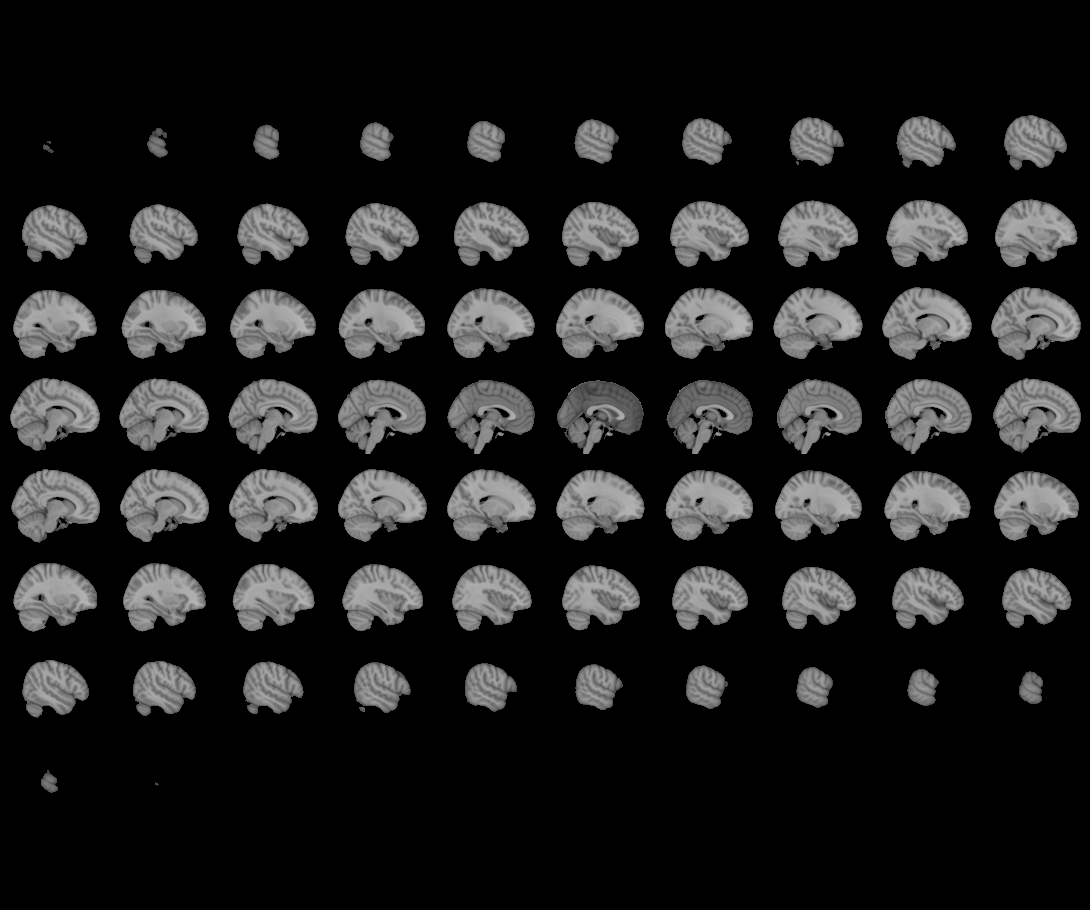
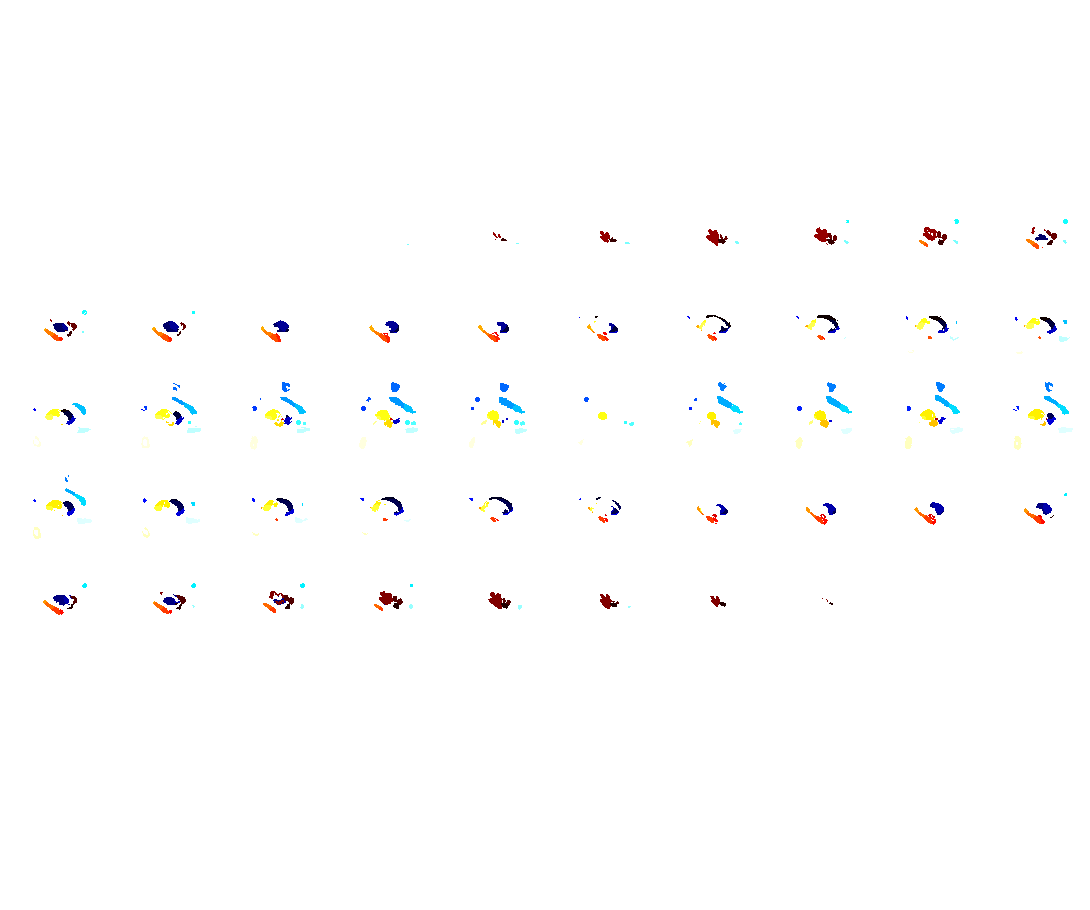

In [3]:
# Define path to mask
mask_path = '../ROI_masks/MAX_ROIs_final_gm.nii.gz'
mask = mask_path.split('/')[-1]

# Load the ROI mask
mask = nil.image.load_img(mask_path)

view = plotting.view_img(mask_path,vmax=rois.index.max(),symmetric_cmap = False,)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [4]:
# Load MSS and MVM response
mss_threat = np.squeeze(nil.image.load_img('/data/bswift-1/Pessoa_Lab/MAX/dataset/positive_runs/Group/MSSt0.nii.gz').get_data())
mss_safe = np.squeeze(nil.image.load_img('/data/bswift-1/Pessoa_Lab/MAX/dataset/positive_runs/Group/MSSs0.nii.gz').get_data())

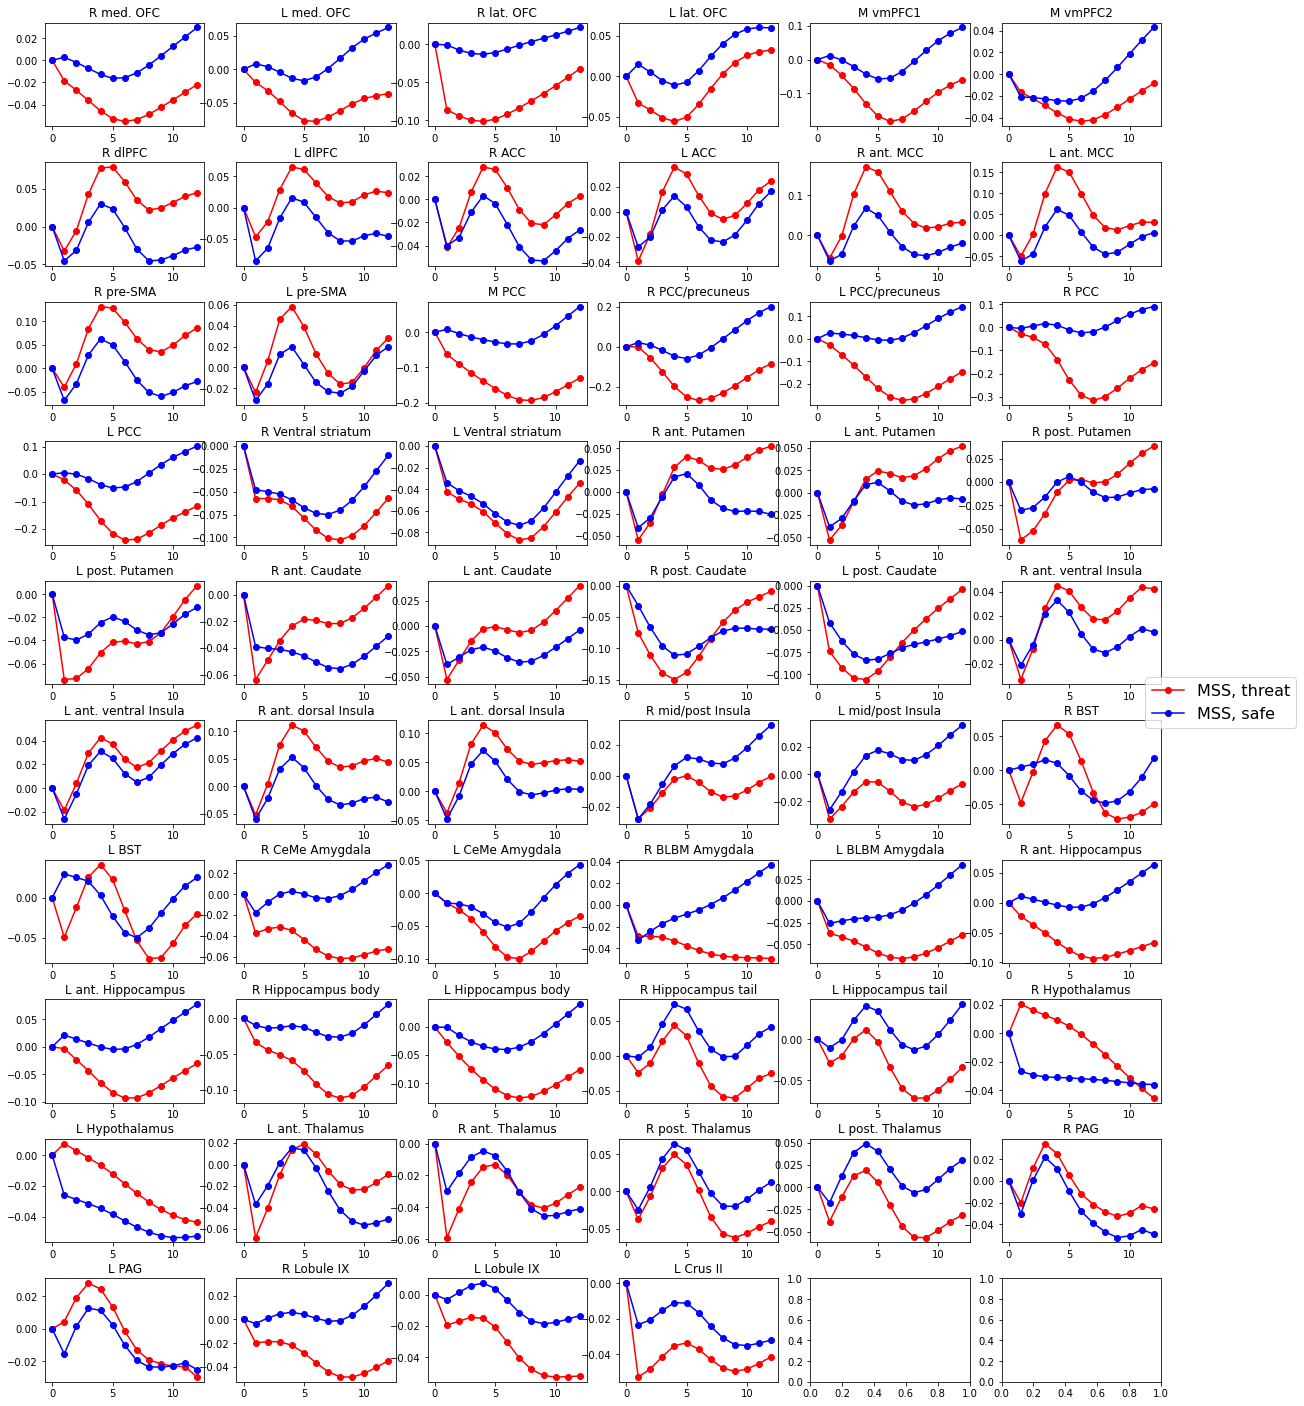

In [5]:
fig, axes = plt.subplots(nrows=10, ncols = 6, figsize=(20,25))
axes = axes.flatten()
markersize=6
fig.subplots_adjust(wspace=0.2,hspace=0.35)

for ii, roi in rois.items():
    axes[ii-1].plot(mss_threat[mask.get_data() == ii].mean(axis=0),c='red',alpha=1,marker='o',markersize=markersize,label='MSS, threat')
    axes[ii-1].plot(mss_safe[mask.get_data() == ii].mean(axis=0),c='blue',alpha=1,marker='o',markersize=markersize,label='MSS, safe')
    axes[ii-1].set_title(roi)
fig.legend(axes[ii-1].get_legend_handles_labels()[1],loc='center right',fontsize=16)